Skills used: Python (Pandas), data frames, data exploration and data cleaning, data visualization with matplotlib

# Bellabeat Case Study

Business task: Determine usage trends with a competitor smart device, then use those trends to provide recommendations to the Bellabeat marketing team.

The data source used can be found at https://www.kaggle.com/datasets/arashnic/fitbit.

The full case study presentation can be found at https://docs.google.com/presentation/d/14l4qsb5pBMROjd_kLRG97SuSvQ2yd26ans05zEiHex4/edit?usp=sharing.

## Importing and Viewing the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_dact = pd.read_csv(r"C:\Users\KayleighMacdonald\OneDrive - Q'Apel Medical\Desktop\Bellabeats\Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
df_hint = pd.read_csv(r"C:\Users\KayleighMacdonald\OneDrive - Q'Apel Medical\Desktop\Bellabeats\Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
df_hstep = pd.read_csv(r"C:\Users\KayleighMacdonald\OneDrive - Q'Apel Medical\Desktop\Bellabeats\Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
df_dsleep = pd.read_csv(r"C:\Users\KayleighMacdonald\OneDrive - Q'Apel Medical\Desktop\Bellabeats\Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
df_weight = pd.read_csv(r"C:\Users\KayleighMacdonald\OneDrive - Q'Apel Medical\Desktop\Bellabeats\Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [4]:
df_dact.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
df_hint.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [6]:
df_hstep.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [7]:
df_dsleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [8]:
df_weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


## Checking each dataframe for nulls, missing values, and incorrect data types

In [9]:
df_dact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [10]:
df_hint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [11]:
df_hstep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [12]:
df_dsleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [13]:
df_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


The datetime columns are in the incorrect format, and will need to be converted into datetime.

## Check how many participants (user IDs) are in each dataframe

In [14]:
df_dact.Id.nunique()
df_dact['Id'].drop_duplicates()

0      1503960366
31     1624580081
62     1644430081
92     1844505072
123    1927972279
154    2022484408
185    2026352035
216    2320127002
247    2347167796
265    2873212765
296    3372868164
316    3977333714
346    4020332650
377    4057192912
381    4319703577
412    4388161847
443    4445114986
474    4558609924
505    4702921684
536    5553957443
567    5577150313
597    6117666160
625    6290855005
654    6775888955
680    6962181067
711    7007744171
737    7086361926
768    8053475328
799    8253242879
818    8378563200
849    8583815059
880    8792009665
909    8877689391
Name: Id, dtype: int64

In [15]:
df_hint.Id.nunique()

33

In [16]:
df_hstep.Id.nunique()

33

In [17]:
df_dsleep.Id.nunique()

24

In [18]:
df_weight.Id.nunique()

8

It was found that there are 33 unique IDs, meaning there were 33 participants in the study. As n>30, we can conclude statistical significance. However, only 24 users logged sleep data, and only 8 users logged weight data. Therefore, we cannot make any statistical conclusions from these datasets.

## Convert any date/time columns to datetime format

In [20]:
df_dact['ActivityDate'] = pd.to_datetime(df_dact['ActivityDate'])
df_hint['ActivityHour'] = pd.to_datetime(df_hint['ActivityHour'])
df_hstep['ActivityHour'] = pd.to_datetime(df_hstep['ActivityHour'])
df_dsleep['SleepDay'] = pd.to_datetime(df_dsleep['SleepDay'])
df_weight['Date'] = pd.to_datetime(df_weight['Date'])

C:\Users\KayleighMacdonald\AppData\Local\Temp\ipykernel_8388\2672303000.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hint['ActivityHour'] = pd.to_datetime(df_hint['ActivityHour'])
C:\Users\KayleighMacdonald\AppData\Local\Temp\ipykernel_8388\2672303000.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hstep['ActivityHour'] = pd.to_datetime(df_hstep['ActivityHour'])
C:\Users\KayleighMacdonald\AppData\Local\Temp\ipykernel_8388\2672303000.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dsleep['SleepDay'] = pd.to_datetime(df_dsleep['SleepDay'])
C:\Users\Kay

## Check for Duplicate Rows

In [21]:
df_dact.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
935    False
936    False
937    False
938    False
939    False
Length: 940, dtype: bool

In [22]:
df_hint.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool

In [23]:
df_hstep.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool

In [24]:
df_dsleep.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
408    False
409    False
410    False
411    False
412    False
Length: 413, dtype: bool

In [25]:
df_weight.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
62    False
63    False
64    False
65    False
66    False
Length: 67, dtype: bool

No duplicate entries were found.

## Creating a Day of the Week Column & Changing Column Order

In [26]:
df_dact['DayOfWeek'] = df_dact['ActivityDate'].dt.day_name()
df_dact
df_dact = df_dact[['Id', 'ActivityDate', 'DayOfWeek', 'SedentaryActiveDistance', 'LightActiveDistance', 'ModeratelyActiveDistance', 'VeryActiveDistance', 'LoggedActivitiesDistance', 'TrackerDistance', 'TotalDistance', 'SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'TotalSteps', 'Calories']]
df_dact

,Id,ActivityDate,DayOfWeek,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,LoggedActivitiesDistance,TrackerDistance,TotalDistance,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,TotalSteps,Calories
0,1503960366,2016-04-12,Tuesday,0.00,6.06,0.55,1.88,0.0,8.500000,8.500000,728,328,13,25,13162,1985
1,1503960366,2016-04-13,Wednesday,0.00,4.71,0.69,1.57,0.0,6.970000,6.970000,776,217,19,21,10735,1797
2,1503960366,2016-04-14,Thursday,0.00,3.91,0.40,2.44,0.0,6.740000,6.740000,1218,181,11,30,10460,1776
3,1503960366,2016-04-15,Friday,0.00,2.83,1.26,2.14,0.0,6.280000,6.280000,726,209,34,29,9762,1745
4,1503960366,2016-04-16,Saturday,0.00,5.04,0.41,2.71,0.0,8.160000,8.160000,773,221,10,36,12669,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,Sunday,0.00,6.80,0.20,1.08,0.0,8.110000,8.110000,1174,245,4,17,10686,2847
936,8877689391,2016-05-09,Monday,0.05,6.24,0.80,11.10,0.0,18.250000,18.250000,1131,217,19,73,20226,3710
937,8877689391,2016-05-10,Tuesday,0.00,6.28,0.46,1.35,0.0,8.150000,8.150000,1187,224,11,18,10733,2832
938,8877689391,2016-05-11,Wednesday,0.00,5.89,0.41,13.22,0.0,19.559999,19.559999,1127,213,12,88,21420,3832


In [27]:
df_dsleep['DayOfWeek'] = df_dsleep['SleepDay'].dt.day_name()
df_dsleep = df_dsleep[['Id', 'SleepDay', 'DayOfWeek', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']]
df_dsleep

,Id,SleepDay,DayOfWeek,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,Tuesday,1,327,346
1,1503960366,2016-04-13,Wednesday,2,384,407
2,1503960366,2016-04-15,Friday,1,412,442
3,1503960366,2016-04-16,Saturday,2,340,367
4,1503960366,2016-04-17,Sunday,1,700,712
...,...,...,...,...,...,...
408,8792009665,2016-04-30,Saturday,1,343,360
409,8792009665,2016-05-01,Sunday,1,503,527
410,8792009665,2016-05-02,Monday,1,415,423
411,8792009665,2016-05-03,Tuesday,1,516,545


## Creating Hour Columns, Resetting Index, & Changing Column Order

In [28]:
df_hint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   TotalIntensity    22099 non-null  int64         
 3   AverageIntensity  22099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 690.7 KB


In [29]:
df_hint.index = df_hint['ActivityHour']
df_hint.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
ActivityHour,,,,
2016-04-12 00:00:00,1503960366,2016-04-12 00:00:00,20,0.333333
2016-04-12 01:00:00,1503960366,2016-04-12 01:00:00,8,0.133333
2016-04-12 02:00:00,1503960366,2016-04-12 02:00:00,7,0.116667
2016-04-12 03:00:00,1503960366,2016-04-12 03:00:00,0,0.000000
2016-04-12 04:00:00,1503960366,2016-04-12 04:00:00,0,0.000000


In [30]:
df_hint['HourOnly'] = df_hint['ActivityHour'].dt.hour
df_hint.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,HourOnly
ActivityHour,,,,,
2016-04-12 00:00:00,1503960366,2016-04-12 00:00:00,20,0.333333,0
2016-04-12 01:00:00,1503960366,2016-04-12 01:00:00,8,0.133333,1
2016-04-12 02:00:00,1503960366,2016-04-12 02:00:00,7,0.116667,2
2016-04-12 03:00:00,1503960366,2016-04-12 03:00:00,0,0.000000,3
2016-04-12 04:00:00,1503960366,2016-04-12 04:00:00,0,0.000000,4


In [31]:
df_hint = df_hint[['Id', 'ActivityHour', 'HourOnly', 'AverageIntensity', 'TotalIntensity']]
df_hint

,Id,ActivityHour,HourOnly,AverageIntensity,TotalIntensity
ActivityHour,,,,,
2016-04-12 00:00:00,1503960366,2016-04-12 00:00:00,0,0.333333,20
2016-04-12 01:00:00,1503960366,2016-04-12 01:00:00,1,0.133333,8
2016-04-12 02:00:00,1503960366,2016-04-12 02:00:00,2,0.116667,7
2016-04-12 03:00:00,1503960366,2016-04-12 03:00:00,3,0.000000,0
2016-04-12 04:00:00,1503960366,2016-04-12 04:00:00,4,0.000000,0
...,...,...,...,...,...
2016-05-12 10:00:00,8877689391,2016-05-12 10:00:00,10,0.200000,12
2016-05-12 11:00:00,8877689391,2016-05-12 11:00:00,11,0.483333,29
2016-05-12 12:00:00,8877689391,2016-05-12 12:00:00,12,1.550000,93


In [32]:
df_hstep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   StepTotal     22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [33]:
df_hstep.index = df_hstep['ActivityHour']
df_hstep.head()

,Id,ActivityHour,StepTotal
ActivityHour,,,
2016-04-12 00:00:00,1503960366,2016-04-12 00:00:00,373
2016-04-12 01:00:00,1503960366,2016-04-12 01:00:00,160
2016-04-12 02:00:00,1503960366,2016-04-12 02:00:00,151
2016-04-12 03:00:00,1503960366,2016-04-12 03:00:00,0
2016-04-12 04:00:00,1503960366,2016-04-12 04:00:00,0


In [34]:
df_hstep['HourOnly'] = df_hstep['ActivityHour'].dt.hour
df_hstep.head()

,Id,ActivityHour,StepTotal,HourOnly
ActivityHour,,,,
2016-04-12 00:00:00,1503960366,2016-04-12 00:00:00,373,0
2016-04-12 01:00:00,1503960366,2016-04-12 01:00:00,160,1
2016-04-12 02:00:00,1503960366,2016-04-12 02:00:00,151,2
2016-04-12 03:00:00,1503960366,2016-04-12 03:00:00,0,3
2016-04-12 04:00:00,1503960366,2016-04-12 04:00:00,0,4


In [35]:
df_hstep = df_hstep[['Id', 'ActivityHour', 'HourOnly', 'StepTotal']]
df_hstep

,Id,ActivityHour,HourOnly,StepTotal
ActivityHour,,,,
2016-04-12 00:00:00,1503960366,2016-04-12 00:00:00,0,373
2016-04-12 01:00:00,1503960366,2016-04-12 01:00:00,1,160
2016-04-12 02:00:00,1503960366,2016-04-12 02:00:00,2,151
2016-04-12 03:00:00,1503960366,2016-04-12 03:00:00,3,0
2016-04-12 04:00:00,1503960366,2016-04-12 04:00:00,4,0
...,...,...,...,...
2016-05-12 10:00:00,8877689391,2016-05-12 10:00:00,10,514
2016-05-12 11:00:00,8877689391,2016-05-12 11:00:00,11,1407
2016-05-12 12:00:00,8877689391,2016-05-12 12:00:00,12,3135


## How do our subjects compare to the National Avg?

In [36]:
df_dact.describe()

,Id,ActivityDate,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,LoggedActivitiesDistance,TrackerDistance,TotalDistance,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,TotalSteps,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,0.001606,3.340819,0.567543,1.502681,0.108171,5.475351,5.489702,991.210638,192.812766,13.564894,21.164894,7637.910638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,0.000000,1.945000,0.000000,0.000000,0.000000,2.620000,2.620000,729.750000,127.000000,0.000000,0.000000,3789.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,0.000000,3.365000,0.240000,0.210000,0.000000,5.245000,5.245000,1057.500000,199.000000,6.000000,4.000000,7405.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,0.000000,4.782500,0.800000,2.052500,0.000000,7.710000,7.712500,1229.500000,264.000000,19.000000,32.000000,10727.000000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,0.110000,10.710000,6.480000,21.920000,4.942142,28.030001,28.030001,1440.000000,518.000000,143.000000,210.000000,36019.000000,4900.000000
std,2.424805e+09,NaN,0.007346,2.040655,0.883580,2.658941,0.619897,3.907276,3.924606,301.267437,109.174700,19.987404,32.844803,5087.150742,718.166862


Avg Steps per Day = 7637.910638

Avg of 5.25 miles traveled per day

This is below the recommended amount of 10,000 steps per day, but is higher than national U.S. average of 5,117 steps per day.

Avg Calories Burned per Day = 2303.609574

As we do not know the gender distribution of our sample, it is difficult to determine how much this differs from the average population. However, we can conclude that the participants are somewhat active, and not entirely sedentary.

Each day, subjects spent an avg of 991.210638 minutes (16.5201773 hours) sedentary, and 227.542 minutes (3.79 hours) active. Of this, 192.813 minutes (or 3.214 hours) is light activity.
This suggests that the most common form of activity is light activity, such as walking.

Note - only an avg of .108 miles was logged manually vs with the tracker -- people prefer to have distance automatically tracked

In [43]:
df_dsleep.describe()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413,413.000000,413.000000,413.000000
mean,5.000979e+09,2016-04-26 12:40:05.811137792,1.118644,419.467312,458.639225
min,1.503960e+09,2016-04-12 00:00:00,1.000000,58.000000,61.000000
25%,3.977334e+09,2016-04-19 00:00:00,1.000000,361.000000,403.000000
50%,4.702922e+09,2016-04-27 00:00:00,1.000000,433.000000,463.000000
75%,6.962181e+09,2016-05-04 00:00:00,1.000000,490.000000,526.000000
max,8.792010e+09,2016-05-12 00:00:00,3.000000,796.000000,961.000000
std,2.060360e+09,NaN,0.345521,118.344679,127.101607


Avg Minutes Asleep = 418.467 minutes (6.97 hours)

Avg Minutes in Bed = 458.639 minutes (7.644 hours)

This is slightly below the national average of 7.15 hours in the United States

Note - The number of participants in weight tracking is too small to make any conclusions (8/33 partipants logged their weight)

## How often were features used?

Note - Steps, Activity Level (heart rate), and calories burned are calculated automatically

In [47]:
df_dsleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   DayOfWeek           413 non-null    object        
 3   TotalSleepRecords   413 non-null    int64         
 4   TotalMinutesAsleep  413 non-null    int64         
 5   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 19.5+ KB


Daily actvity contains 940 rows (logged automatically). However, sleep data only contains 413 rows, and 24 users. This indicates that 72.73% of users use the sleep logging feature, and only used it for 17 days of the study each.

In [49]:
df_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   Fat             2 non-null      float64       
 5   BMI             67 non-null     float64       
 6   IsManualReport  67 non-null     bool          
 7   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 3.9 KB


There were only 8 users who logged weight, for a total of 67 rows. This indicates that only 24.24% of users used the weight logging feature, and only used it for 8 days of the study each.

In [51]:
df_weight.nunique()

Id                 8
Date              56
WeightKg          34
WeightPounds      34
Fat                2
BMI               36
IsManualReport     2
LogId             56
dtype: int64

In [52]:
df_weight['Id'].value_counts()

Id
6962181067    30
8877689391    24
4558609924     5
1503960366     2
2873212765     2
4319703577     2
1927972279     1
5577150313     1
Name: count, dtype: int64

This shows that only 2/33 users logged weight frequently. 6/33 users logged weight 5 times or less.
The least known stat was "Fat". This was only logged by two users, once each.

## Graphs and Data Visualization

In [54]:
plt.style.available
plt.style.use('fivethirtyeight')

In [55]:
x = df_dact.groupby('DayOfWeek').mean()
x = x[['TotalDistance', 'TotalSteps', 'Calories']].reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
x


,TotalDistance,TotalSteps,Calories
DayOfWeek,,,
Sunday,5.027190,6933.231405,2263.000000
Monday,5.552917,7780.866667,2324.208333
Tuesday,5.832237,8125.006579,2356.013158
Wednesday,5.488333,7559.373333,2302.620000
Thursday,5.312245,7405.836735,2199.571429
Friday,5.309921,7448.230159,2331.785714
Saturday,5.854677,8152.975806,2354.967742


<Axes: title={'center': 'Average Distance per Day'}, xlabel='Day of Week', ylabel='Distance (miles)'>

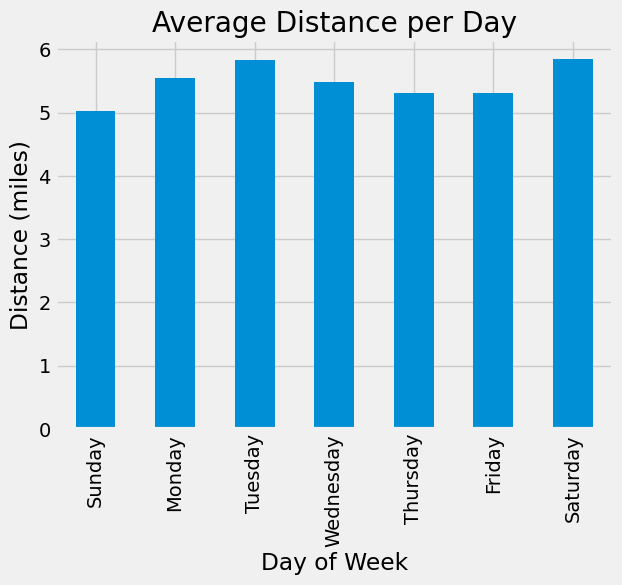

In [56]:
x.plot.bar(y = 'TotalDistance', title = 'Average Distance per Day', xlabel = 'Day of Week', ylabel = 'Distance (miles)', legend = None)

<Axes: title={'center': 'Average Steps per Day'}, xlabel='Day of Week', ylabel='Total Steps'>

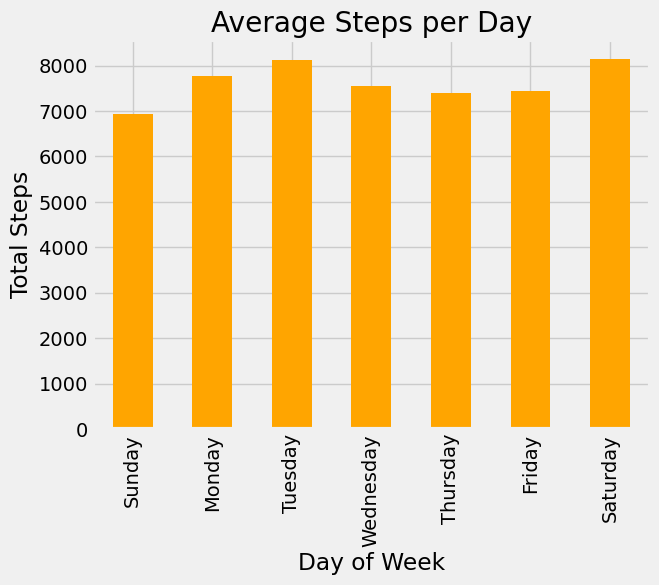

In [57]:
x.plot.bar(y = 'TotalSteps', title = 'Average Steps per Day', xlabel = 'Day of Week', ylabel = 'Total Steps', legend = None, color = 'Orange')

<Axes: title={'center': 'Average Calories per Day'}, xlabel='Day of Week', ylabel='Calories'>

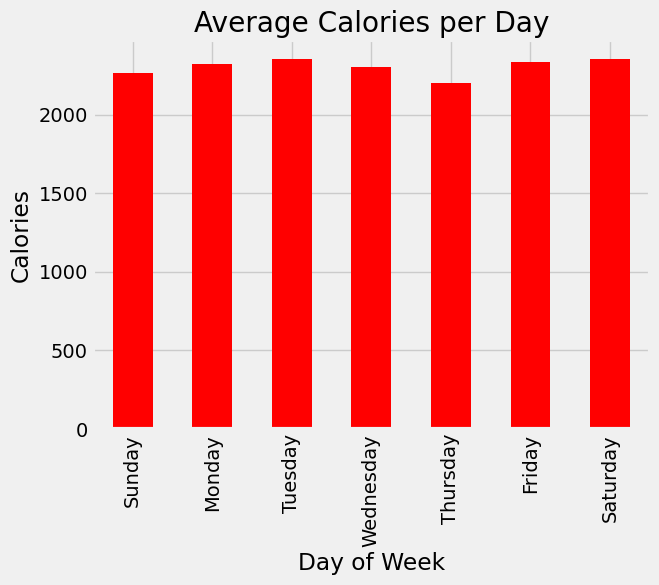

In [58]:
x.plot.bar(y = 'Calories', title = 'Average Calories per Day', xlabel = 'Day of Week', ylabel = 'Calories', legend = None, color = 'Red')

In [59]:
x.corr()

,TotalDistance,TotalSteps,Calories
TotalDistance,1.000000,0.993018,0.697302
TotalSteps,0.993018,1.000000,0.702764
Calories,0.697302,0.702764,1.000000


The graphs indicate a correlation between total distance, total steps, and calories burned. After calculating the correlation coefficient, there is a very high correlation between distance and steps at .99, and a strong correlation with calories burned at .69 and .70 respectively.

In [60]:
y = df_dact.groupby('DayOfWeek').mean()
y = y[['LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
y

,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
DayOfWeek,,,
Sunday,173.975207,14.528926,19.983471
Monday,192.058333,14.000000,23.108333
Tuesday,197.342105,14.335526,22.953947
Wednesday,189.853333,13.100000,20.780000
Thursday,185.421769,11.959184,19.408163
Friday,204.198413,12.111111,20.055556
Saturday,207.145161,15.201613,21.919355


<Axes: title={'center': 'Active Minutes per Day'}, xlabel='Day of Week', ylabel='Active Minutes'>

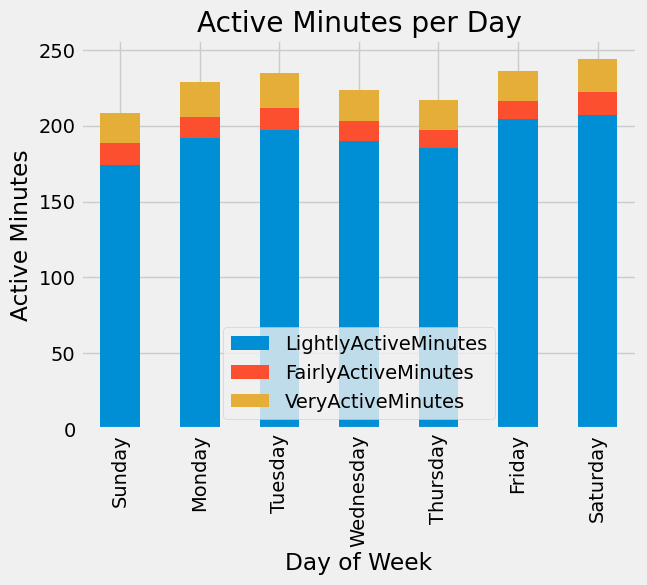

In [61]:
y.plot.bar(stacked = 'True', title = 'Active Minutes per Day', xlabel = 'Day of Week', ylabel = 'Active Minutes')

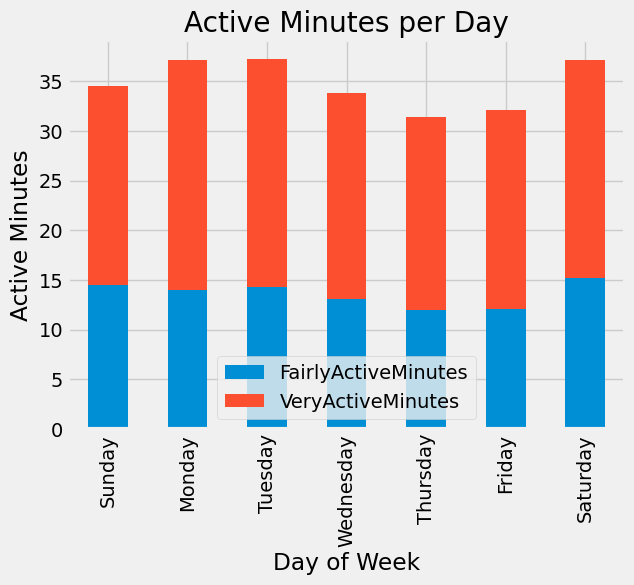

In [62]:
y2 = y[['FairlyActiveMinutes', 'VeryActiveMinutes']].reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
y2
y2.plot.bar(stacked = 'True', title = 'Active Minutes per Day', xlabel = 'Day of Week', ylabel = 'Active Minutes').legend(loc = 'lower center')

The graphs indicate that more distance is traveled/steps taken on Tuesdays and Saturdays. However, more intense activity takes place mostly on Tuesdays, Fridays, and Saturdays.

In [64]:
z = df_hint.groupby('HourOnly').mean()
z

,Id,ActivityHour,AverageIntensity,TotalIntensity
HourOnly,,,,
0,4.846554e+09,2016-04-26 04:54:28.522483968,0.035493,2.129550
1,4.844238e+09,2016-04-26 05:37:48.810289408,0.023651,1.419078
2,4.844238e+09,2016-04-26 06:37:48.810289408,0.017399,1.043944
3,4.844238e+09,2016-04-26 07:37:48.810289408,0.007396,0.443730
4,4.844801e+09,2016-04-26 08:13:23.433476352,0.010551,0.633047
5,4.844801e+09,2016-04-26 09:13:23.433476352,0.082511,4.950644
6,4.847483e+09,2016-04-26 10:09:01.353383424,0.129520,7.771214
7,4.847483e+09,2016-04-26 11:09:01.353383424,0.178894,10.733620
8,4.847483e+09,2016-04-26 12:09:01.353383424,0.244468,14.668099


([<matplotlib.axis.XTick at 0x27695a95e10>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24')])

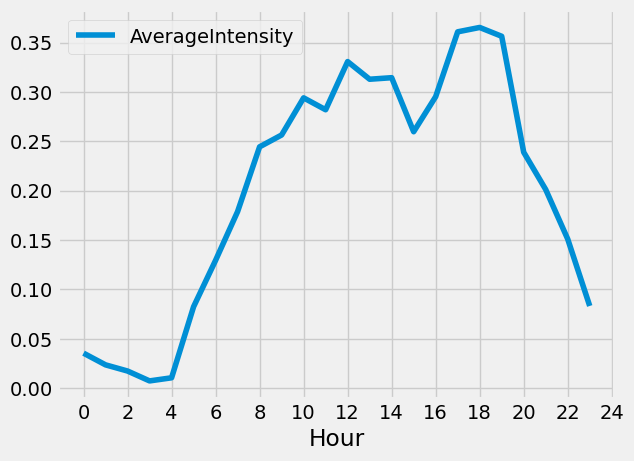

In [65]:
z.plot(y ='AverageIntensity', xlabel = 'Hour')
plt.xticks(np.arange(0, 26, 2)) 

In [66]:
a = df_hstep.groupby('HourOnly').mean()
a

,Id,ActivityHour,StepTotal
HourOnly,,,
0,4.846554e+09,2016-04-26 04:54:28.522483968,42.188437
1,4.844238e+09,2016-04-26 05:37:48.810289408,23.102894
2,4.844238e+09,2016-04-26 06:37:48.810289408,17.110397
3,4.844238e+09,2016-04-26 07:37:48.810289408,6.426581
4,4.844801e+09,2016-04-26 08:13:23.433476352,12.699571
5,4.844801e+09,2016-04-26 09:13:23.433476352,43.869099
6,4.847483e+09,2016-04-26 10:09:01.353383424,178.508056
7,4.847483e+09,2016-04-26 11:09:01.353383424,306.049409
8,4.847483e+09,2016-04-26 12:09:01.353383424,427.544576


([<matplotlib.axis.XTick at 0x27695781c90>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24')])

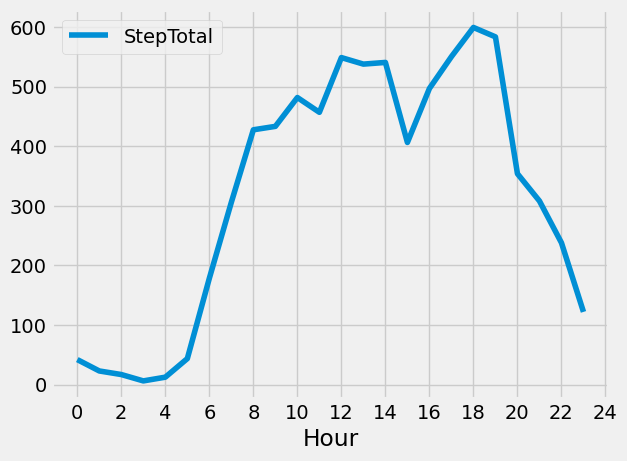

In [67]:
a.plot(y ='StepTotal', xlabel = 'Hour')
plt.xticks(np.arange(0, 26, 2)) 

The highest intensity of exercise, as well as the highest step count, both occur between 18:00:00 (or 6PM) and 20:00:00 (or 8PM). They are also high between 12:00:00 (or 12PM) and 14:00:00 (2PM)
This shows that the sample population prefers to exercise in the afternoon or in the evening.